##                                       Lead Score Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals.Any professionals who are interested in the courses check their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%


### Goals and Objectives 

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### IMPORT LIBRARIES 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

## Importing Pandas and NumPy
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import statsmodels

import statsmodels.api as sm

# Import metrics from sklearn for evaluation

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve


### Step 1: Reading of  Data

In [2]:
# Importing  dataset

#df_lead=pd.read_csv("Leads.csv",encoding="ISO-8859-1")
df_lead=pd.read_csv("Leads.csv",encoding="ISO-8859-1")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Understanding and Inspection of  Data

In [3]:
# Let's see the type of each column

df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### There are null values in the dataset thats should be treated

In [4]:
# Let's check the dimensions of the dataframe

df_lead.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe

df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# let's look at the columns of the dataframe

df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Step 3: Data Cleaning and Data Preparation

In [7]:
# 1. Converting Select values to NaN in the dataset.

df_lead = df_lead.replace('Select', np.nan)

In [8]:
# 2. dropping Lead Number and Prospect ID because they are serving the same purpose

df_lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# 3. Check for the null values percentage in the columns

(round(100 * df_lead.isnull().sum().sort_values(ascending=False)/len(df_lead)),2)

(How did you hear about X Education               78.0
 Lead Profile                                     74.0
 Lead Quality                                     52.0
 Asymmetrique Activity Score                      46.0
 Asymmetrique Profile Score                       46.0
 Asymmetrique Profile Index                       46.0
 Asymmetrique Activity Index                      46.0
 City                                             40.0
 Specialization                                   37.0
 Tags                                             36.0
 What matters most to you in choosing a course    29.0
 What is your current occupation                  29.0
 Country                                          27.0
 TotalVisits                                       1.0
 Page Views Per Visit                              1.0
 Last Activity                                     1.0
 Lead Source                                       0.0
 Get updates on DM Content                         0.0
 Update me

In [11]:
# 4. Drop the columns with null values more than 40 %

df_lead = df_lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education','City'],axis=1)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [12]:
# 5. Check for the null values percentage in the columns again after dropping few columns

(round(100 * df_lead.isnull().sum().sort_values(ascending=False)/len(df_lead)),2)

(Specialization                                   37.0
 Tags                                             36.0
 What matters most to you in choosing a course    29.0
 What is your current occupation                  29.0
 Country                                          27.0
 TotalVisits                                       1.0
 Page Views Per Visit                              1.0
 Last Activity                                     1.0
 Lead Source                                       0.0
 Receive More Updates About Our Courses            0.0
 Lead Origin                                       0.0
 Digital Advertisement                             0.0
 Update me on Supply Chain Content                 0.0
 Get updates on DM Content                         0.0
 I agree to pay the amount through cheque          0.0
 A free copy of Mastering The Interview            0.0
 Through Recommendations                           0.0
 Search                                            0.0
 Newspaper

##### Observations:----
There are five columns with high null values:
specialization,tags,What matters most to you in choosing a course, What is your current occupation,Country.

In [13]:
# 1. Country column

round(df_lead['Country'].value_counts(normalize=True, dropna = False)* 100,2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [14]:
# Observation:
# It is safe to drop this column. Most of the data is  for India and Nan 

In [15]:
#Drop the country column

df_lead.drop('Country', axis = 1, inplace = True)

In [16]:
# 2. Tags column

round(df_lead['Tags'].value_counts(normalize=True, dropna = False)* 100,2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [17]:
# Observation:
# It is safe to drop this column. Most of the data is  Nan 

In [18]:
#Drop the Tags column

df_lead.drop('Tags', axis = 1, inplace = True)

In [19]:
# 3.What matters most to you in choosing a course column

round(df_lead['What matters most to you in choosing a course'].value_counts(normalize=True, dropna = False)* 100,2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
# Observation:
# It is safe to drop this column. Most of the data is for better career prospets and Nan-----approx 100 %

In [21]:
# Drop the What matters most to you in choosing a course column

df_lead.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [22]:
# 4. What is your current occupation column
 
round(df_lead['What is your current occupation'].value_counts(normalize=True, dropna = False)* 100,2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [23]:
# We will not drop this column as it may be useful for our analysis

df_lead = df_lead[~pd.isnull(df_lead['What is your current occupation'])]

In [24]:
# 5. Specialization  column

round(df_lead['Specialization'].value_counts(normalize=True, dropna = False)* 100,2)

NaN                                  29.73
Finance Management                   11.63
Marketing Management                 10.35
Human Resource Management            10.32
Operations Management                 6.03
Business Administration               4.79
Supply Chain Management               4.24
IT Projects Management                4.24
Banking, Investment And Insurance     4.11
Media and Advertising                 2.47
Travel and Tourism                    2.29
International Business                2.11
Healthcare Management                 1.91
Hospitality Management                1.42
E-COMMERCE                            1.24
Retail Management                     1.19
Rural and Agribusiness                0.89
E-Business                            0.66
Services Excellence                   0.38
Name: Specialization, dtype: float64

In [25]:
# Drop the null values rows in the column 'Specialization'

df_lead = df_lead[~pd.isnull(df_lead['Specialization'])]

In [26]:
# Check the null values again

df_lead.isnull().sum()

Lead Origin                                  0
Lead Source                                  8
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                 61
Total Time Spent on Website                  0
Page Views Per Visit                        61
Last Activity                               49
Specialization                               0
What is your current occupation              0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Update me on Supply Chain Content            0
Get updates on DM Content                    0
I agree to pa

In [27]:
# After checking the null values again ,few columns are still left with null values.
# Need to treat them
# Lead Source, Last Activity, Page Views Per Visit, TotalVisits 

In [28]:
# 1. Lead source column

round(df_lead['Lead Source'].value_counts(normalize=True, dropna = False)* 100,2)

Direct Traffic       38.89
Google               32.67
Organic Search       13.53
Reference             8.47
Olark Chat            4.71
Referral Sites        0.61
Facebook              0.35
Welingak Website      0.33
NaN                   0.17
Click2call            0.09
bing                  0.04
Social Media          0.04
Pay per Click Ads     0.02
WeLearn               0.02
testone               0.02
Press_Release         0.02
Name: Lead Source, dtype: float64

In [29]:
# impute the missing values with the mode of data i.e.'Google'

#df_lead.fillna(df_lead.mode()[0], inplace=True)

df_lead['Lead Source'].fillna(df_lead['Lead Source'].mode().values[0], inplace=True)


In [30]:
round(df_lead['Lead Source'].value_counts(normalize=True, dropna = False)* 100,2)

Direct Traffic       39.06
Google               32.67
Organic Search       13.53
Reference             8.47
Olark Chat            4.71
Referral Sites        0.61
Facebook              0.35
Welingak Website      0.33
Click2call            0.09
bing                  0.04
Social Media          0.04
Pay per Click Ads     0.02
WeLearn               0.02
testone               0.02
Press_Release         0.02
Name: Lead Source, dtype: float64

In [31]:
#Checking for Null Values again 
df_lead.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                 61
Total Time Spent on Website                  0
Page Views Per Visit                        61
Last Activity                               49
Specialization                               0
What is your current occupation              0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Update me on Supply Chain Content            0
Get updates on DM Content                    0
I agree to pa

In [32]:
#2. Total Visit
round(df_lead['TotalVisits'].value_counts(normalize=True, dropna = False)* 100,2)

2.0      18.97
3.0      16.23
4.0      15.34
5.0      10.97
0.0      10.32
6.0       6.32
7.0       4.17
1.0       4.06
8.0       3.17
9.0       2.43
10.0      1.54
NaN       1.33
11.0      1.26
13.0      0.65
12.0      0.59
14.0      0.56
15.0      0.30
16.0      0.26
18.0      0.24
17.0      0.22
20.0      0.22
19.0      0.13
27.0      0.11
21.0      0.11
23.0      0.11
24.0      0.07
22.0      0.07
29.0      0.04
26.0      0.04
25.0      0.04
55.0      0.02
30.0      0.02
43.0      0.02
115.0     0.02
251.0     0.02
28.0      0.02
Name: TotalVisits, dtype: float64

In [33]:
#2. Total Visits
# We can replce the NULLs here with the missing values and since Visits cant be in Decimal will convert that to Integer
df_lead.TotalVisits.fillna(df_lead.TotalVisits.median(), inplace=True)
df_lead.TotalVisits = df_lead.TotalVisits.astype('int')

In [34]:
#Checking for Null Values again 
df_lead.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                        61
Last Activity                               49
Specialization                               0
What is your current occupation              0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Update me on Supply Chain Content            0
Get updates on DM Content                    0
I agree to pa

In [35]:
#3. Pages View per visit
# We will replace the NULLs here with the median 
df_lead['Page Views Per Visit'].fillna(df_lead['Page Views Per Visit'].median(), inplace=True)


In [36]:
#Checking for Null Values again 
df_lead.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                               49
Specialization                               0
What is your current occupation              0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Update me on Supply Chain Content            0
Get updates on DM Content                    0
I agree to pa

In [37]:
#4. Last Activity
round(df_lead['Last Activity'].value_counts(normalize=True, dropna = False)* 100,2)

Email Opened                    39.34
SMS Sent                        34.91
Page Visited on Website          7.65
Converted to Lead                4.58
Email Bounced                    2.82
Email Link Clicked               2.69
Olark Chat Conversation          2.41
Form Submitted on Website        1.76
Unreachable                      1.28
NaN                              1.06
Unsubscribed                     0.74
Had a Phone Conversation         0.50
View in browser link Clicked     0.07
Approached upfront               0.07
Email Received                   0.04
Email Marked Spam                0.04
Visited Booth in Tradeshow       0.02
Name: Last Activity, dtype: float64

In [38]:
# we will impute the missing values with the Mode of the data 
df_lead['Last Activity'].fillna(df_lead['Last Activity'].mode().values[0], inplace=True)

In [39]:
#checking for NULLs again 
df_lead.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [40]:
df_lead['Specialization'] = df_lead['Specialization'].fillna('not provided') 

In [41]:
df_lead['Specialization'].value_counts()

Finance Management                   762
Marketing Management                 678
Human Resource Management            676
Operations Management                395
Business Administration              314
Supply Chain Management              278
IT Projects Management               278
Banking, Investment And Insurance    269
Media and Advertising                162
Travel and Tourism                   150
International Business               138
Healthcare Management                125
Hospitality Management                93
E-COMMERCE                            81
Retail Management                     78
Rural and Agribusiness                58
E-Business                            43
Services Excellence                   25
Name: Specialization, dtype: int64

### Step 4:- EDA

#### 4.1. Univariate Analysis

4.1.a Categorical Variables

In [42]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               4603 non-null   object 
 1   Lead Source                               4603 non-null   object 
 2   Do Not Email                              4603 non-null   object 
 3   Do Not Call                               4603 non-null   object 
 4   Converted                                 4603 non-null   int64  
 5   TotalVisits                               4603 non-null   int32  
 6   Total Time Spent on Website               4603 non-null   int64  
 7   Page Views Per Visit                      4603 non-null   float64
 8   Last Activity                             4603 non-null   object 
 9   Specialization                            4603 non-null   object 
 10  What is your current occupation     

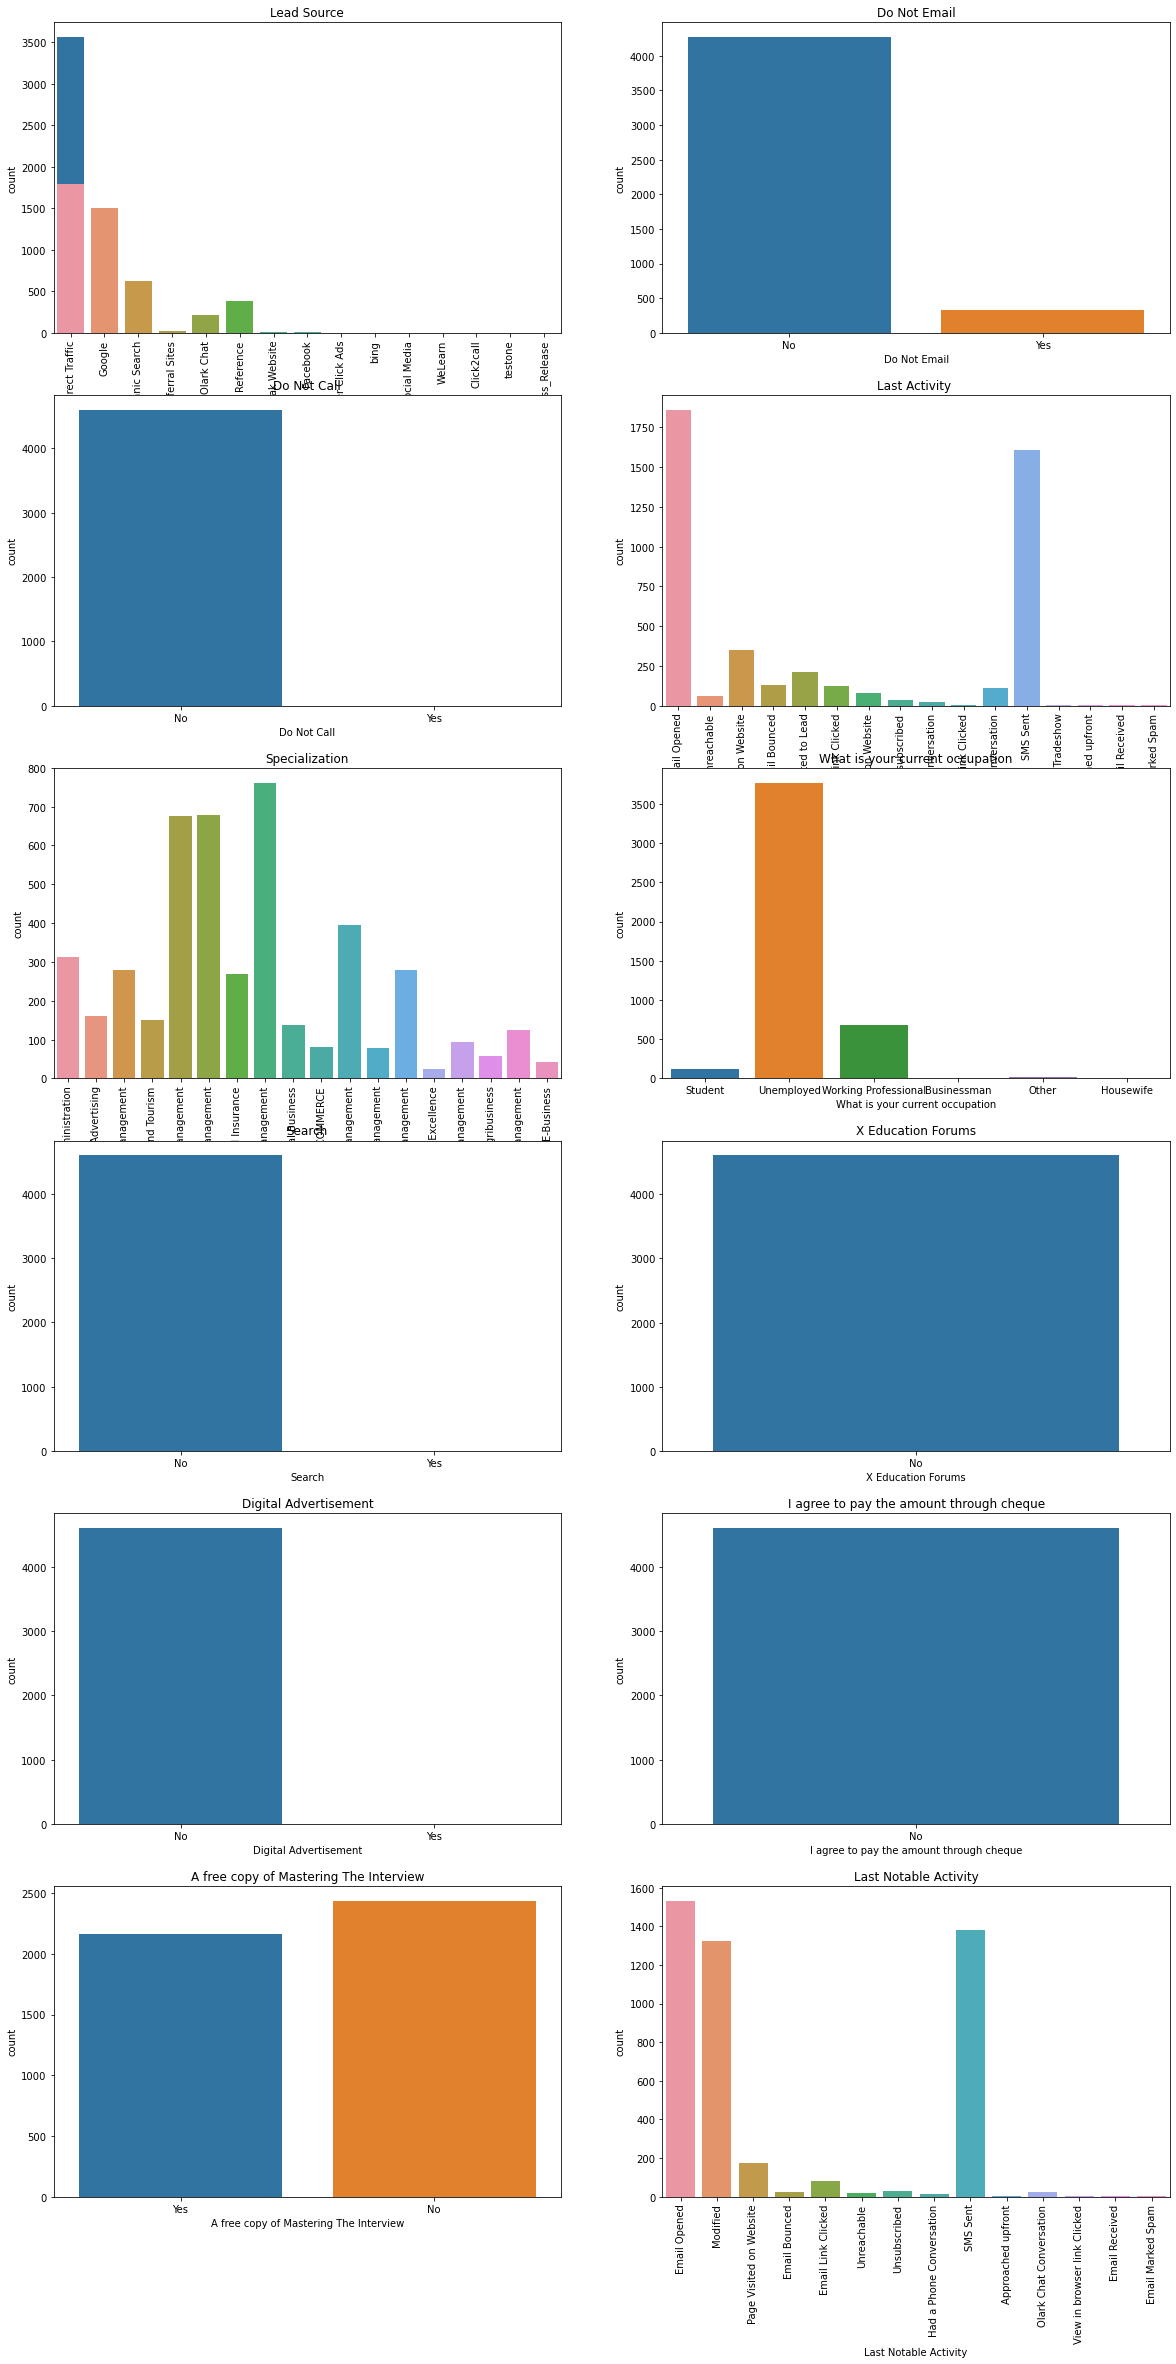

In [43]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,1)
sns.countplot(df_lead['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,2,2)
sns.countplot(df_lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity ')

plt.subplot(6,2,5)
sns.countplot(df_lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(6,2,6)
sns.countplot(df_lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,7)
sns.countplot(df_lead['Search'])
plt.title('Search')

plt.subplot(6,2,8)
sns.countplot(df_lead['Magazine'])
plt.title('Magazine')

plt.subplot(6,2,8)
sns.countplot(df_lead['Newspaper Article'])
plt.title('Newspaper Article ')

plt.subplot(6,2,8)
sns.countplot(df_lead['X Education Forums'])
plt.title('X Education Forums')


plt.subplot(6,2,9)
sns.countplot(df_lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df_lead['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')

plt.subplot(6,2,10)
sns.countplot(df_lead['Update me on Supply Chain Content'])
plt.title('Update me on Supply Chain Content')

plt.subplot(6,2,10)
sns.countplot(df_lead['Get updates on DM Content'])
plt.title('Get updates on DM Content')

plt.subplot(6,2,10)
sns.countplot(df_lead['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(6,2,11)
sns.countplot(df_lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

Text(0.5, 1.0, 'Specialization')

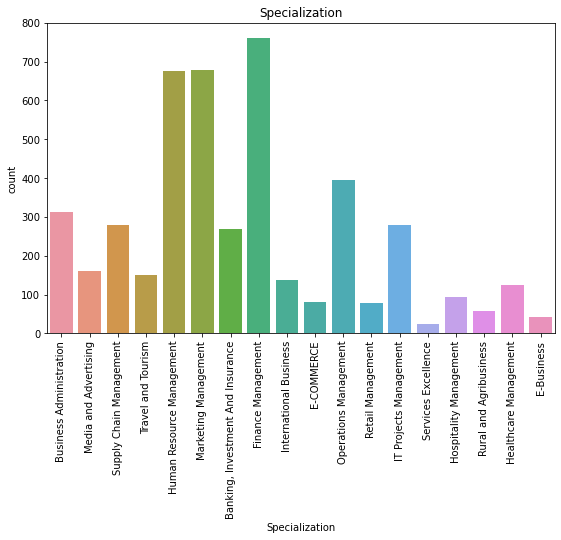

In [44]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,5)
sns.countplot(df_lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')


Text(0.5, 1.0, 'Lead Source')

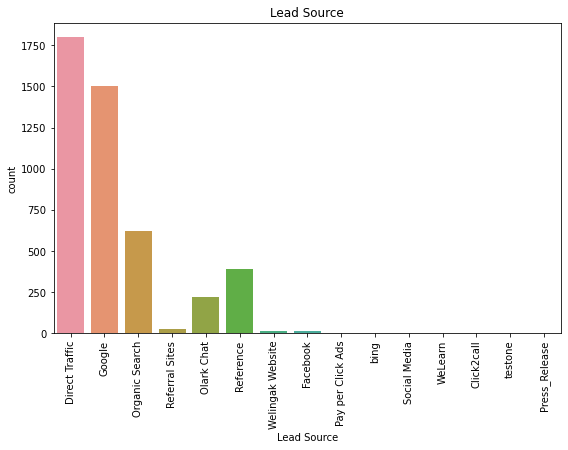

In [45]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(df_lead['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')


Text(0.5, 1.0, 'Last Activity ')

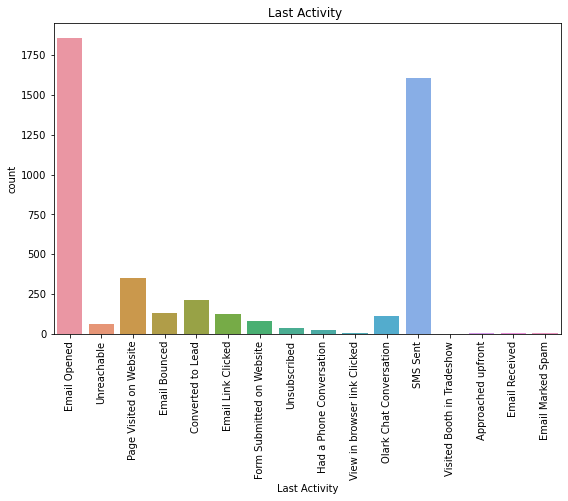

In [46]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,4)
sns.countplot(df_lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity ')

## CONCLUSION

1. Most of the specialization taken are from Finance Management, Marketting Management and HR management.
2. The most mattered lead score is Direct Traffic and Google.
3. People who have opened their email or have sent an SMS can be focused on.
4. Its better to focus on people who are either Unemployed or are working professionals
5. Digital Ads and education forums can be considered for advertisement.


4.1.b Numberical Variables

In [47]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               4603 non-null   object 
 1   Lead Source                               4603 non-null   object 
 2   Do Not Email                              4603 non-null   object 
 3   Do Not Call                               4603 non-null   object 
 4   Converted                                 4603 non-null   int64  
 5   TotalVisits                               4603 non-null   int32  
 6   Total Time Spent on Website               4603 non-null   int64  
 7   Page Views Per Visit                      4603 non-null   float64
 8   Last Activity                             4603 non-null   object 
 9   Specialization                            4603 non-null   object 
 10  What is your current occupation     

In [48]:
#Coverting Page Views Per Visit to int as it doesnt make sense views to be in decimals   
df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].astype('int')

In [49]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               4603 non-null   object
 1   Lead Source                               4603 non-null   object
 2   Do Not Email                              4603 non-null   object
 3   Do Not Call                               4603 non-null   object
 4   Converted                                 4603 non-null   int64 
 5   TotalVisits                               4603 non-null   int32 
 6   Total Time Spent on Website               4603 non-null   int64 
 7   Page Views Per Visit                      4603 non-null   int32 
 8   Last Activity                             4603 non-null   object
 9   Specialization                            4603 non-null   object
 10  What is your current occupation           4603 n

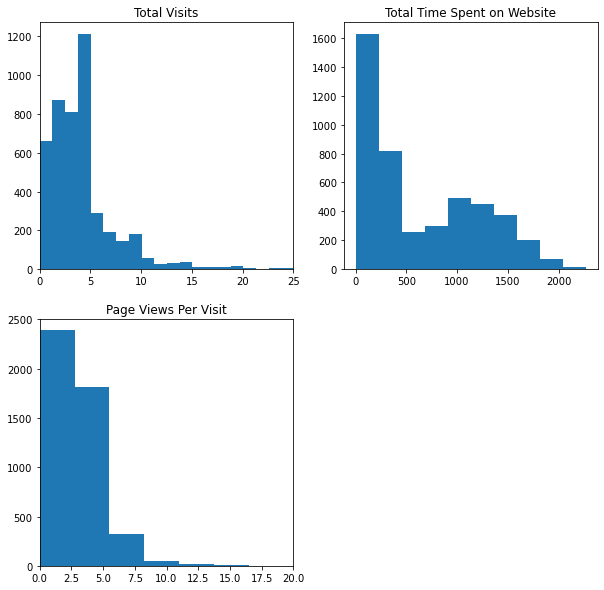

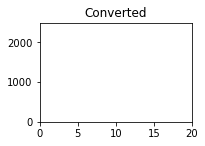

In [50]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

plt.subplot(224)
plt.hist(df_lead['Converted'], bins = 20)
plt.title('Converted')
plt.xlim(0,20)
plt.show()

<AxesSubplot:xlabel='TotalVisits'>

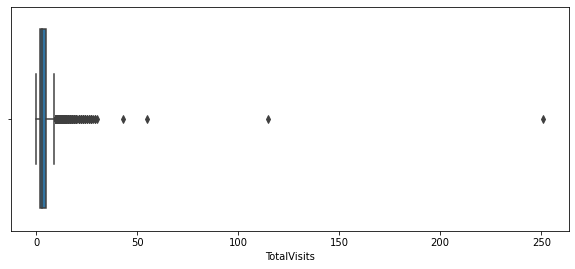

In [51]:
#Lets check for outliners for the numeric variables
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['TotalVisits'])


<AxesSubplot:xlabel='Total Time Spent on Website'>

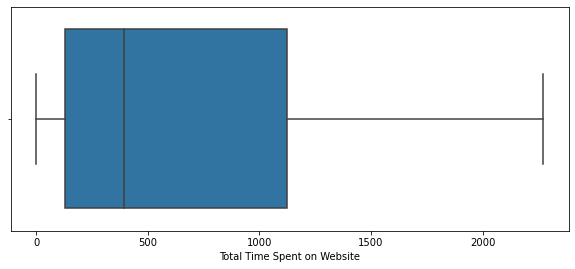

In [52]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['Total Time Spent on Website'])

<AxesSubplot:xlabel='Page Views Per Visit'>

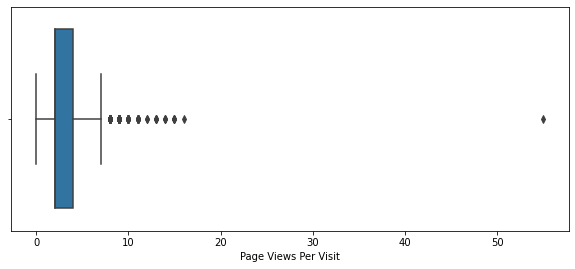

In [53]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['Page Views Per Visit'])

## Conclusion


#### Looking at both the box plots and the statistics, there are upper bound outliers in both TotalVisits and Page Views Per Visit columns. We can also see that the data can be capped at 99 percentile

In [54]:
##Rectifying the outliers 
num_cols = df_lead[['TotalVisits', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,4603.000000,4603.000000
mean,4.270476,2.839887
std,5.415870,2.155363
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,2.000000
75%,5.000000,4.000000
90%,8.000000,5.000000
95%,11.000000,6.000000
99%,19.000000,9.000000


In [55]:
# capping at 99 percentile
df_lead['TotalVisits'].loc[df_lead['TotalVisits'] >= df_lead['TotalVisits'].quantile(0.99)] = df_lead['TotalVisits'].quantile(0.99)

In [56]:
df_lead['Page Views Per Visit'].loc[df_lead['Page Views Per Visit'] >= 
                            df_lead['Page Views Per Visit'].quantile(0.99)] = df_lead['Page Views Per Visit'].quantile(0.99)

In [57]:
#Checking the outliners again 

<AxesSubplot:xlabel='Page Views Per Visit'>

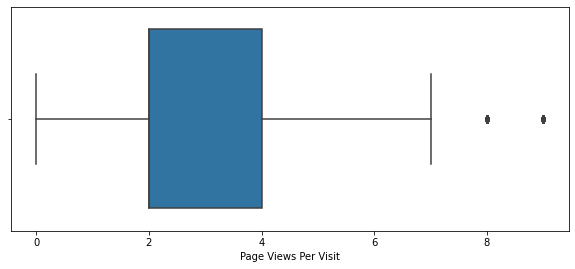

In [58]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['Page Views Per Visit'])

<AxesSubplot:xlabel='TotalVisits'>

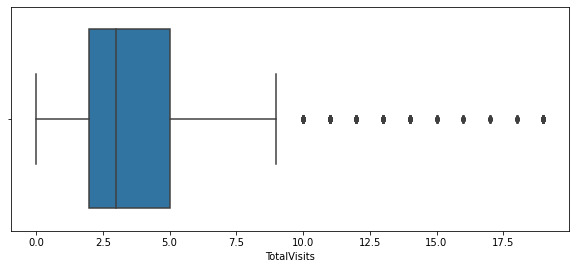

In [59]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['TotalVisits'])


### The outliners have now reduced significantly reduced by capping

4.2 BiVariate Analysis 

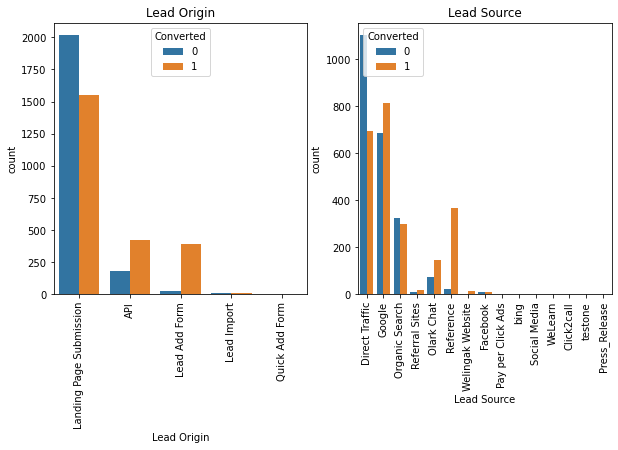

In [60]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

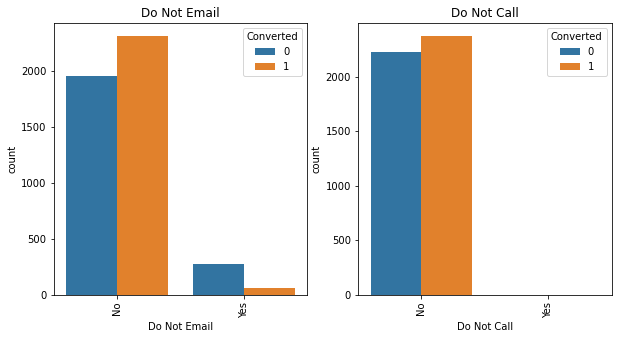

In [61]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

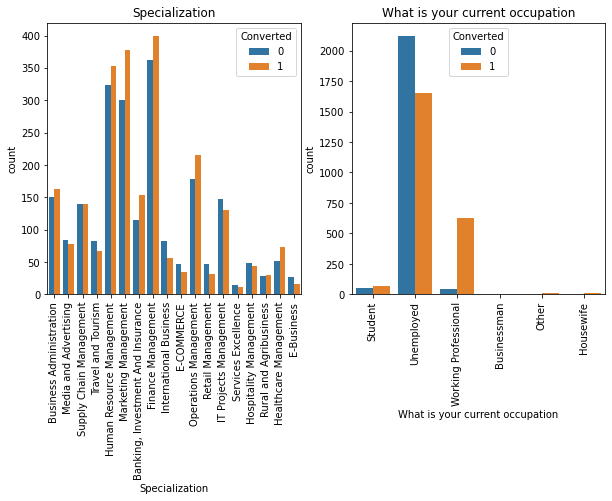

In [62]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

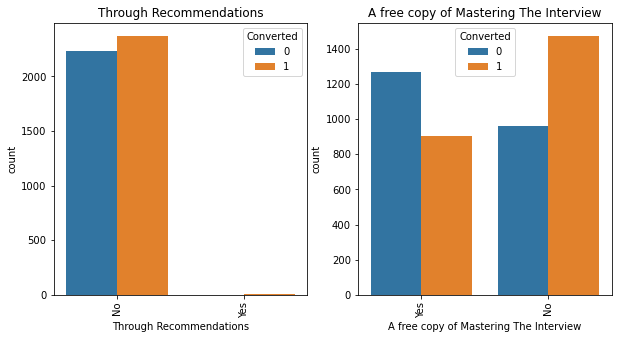

In [63]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

### CONCLUSION

1. Most of the specialization taken are from management.
2. The most mattered lead score is Direct Traffic and Google.
3. People who have opened their email or have answered call can be focused .
4. People who are either Unemployed or are working professionals can be targeted .
5. Recommendations and providing free copy for ointerview can increase the sales.

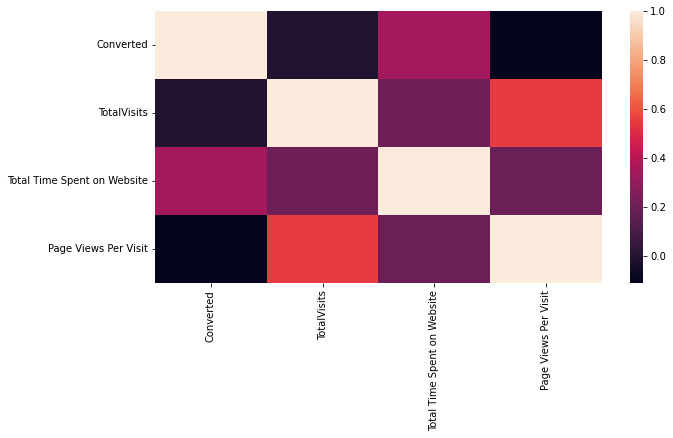

In [64]:
# Now lets check for correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_lead.corr())
plt.show()

#### No significant correlation so no need for any columns needs to be dropped

### Step 5: Creating Dummies


In [65]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               4603 non-null   object
 1   Lead Source                               4603 non-null   object
 2   Do Not Email                              4603 non-null   object
 3   Do Not Call                               4603 non-null   object
 4   Converted                                 4603 non-null   int64 
 5   TotalVisits                               4603 non-null   int32 
 6   Total Time Spent on Website               4603 non-null   int64 
 7   Page Views Per Visit                      4603 non-null   int32 
 8   Last Activity                             4603 non-null   object
 9   Specialization                            4603 non-null   object
 10  What is your current occupation           4603 n

In [66]:
#checking for all object type vars
df_lead.loc[:,df_lead.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [67]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [68]:
# Add the results to the master dataframe
df_lead_dum = pd.concat([df_lead, dummy], axis=1)
df_lead_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,Business Administration,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,No,No,1,2,1640,2,Email Opened,Supply Chain Management,...,0,0,0,1,0,0,0,0,0,0
10,Landing Page Submission,Organic Search,No,No,1,8,1351,8,Email Opened,Travel and Tourism,...,1,0,0,0,0,0,0,0,0,0
11,Landing Page Submission,Direct Traffic,No,No,1,8,1343,2,Page Visited on Website,Human Resource Management,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,No,1,5,210,2,SMS Sent,Business Administration,...,0,0,0,1,0,0,0,0,0,0
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8,1845,2,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2,238,2,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2,199,2,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0


In [69]:
df_lead_dum = df_lead_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_lead_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2,1532,2,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,305,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2,1640,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,8,1351,8,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,8,1343,2,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5,210,2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,8,1845,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2,238,2,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2,199,2,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Step 6: Test-Train Split

In [70]:
X = df_lead_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2,1532,2,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,305,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2,1640,2,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,8,1351,8,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,8,1343,2,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
y = df_lead_dum['Converted']
y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [72]:
#Splitting the train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [73]:
# Scalling the data
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
560,0.263158,0.610475,0.111111,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1093,0.263158,0.599472,0.555556,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2324,0.315789,0.528609,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2219,0.947368,0.628521,0.666667,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3044,0.210526,0.398768,0.444444,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

51.57505974364545

### so the conversion rate is almost 52%

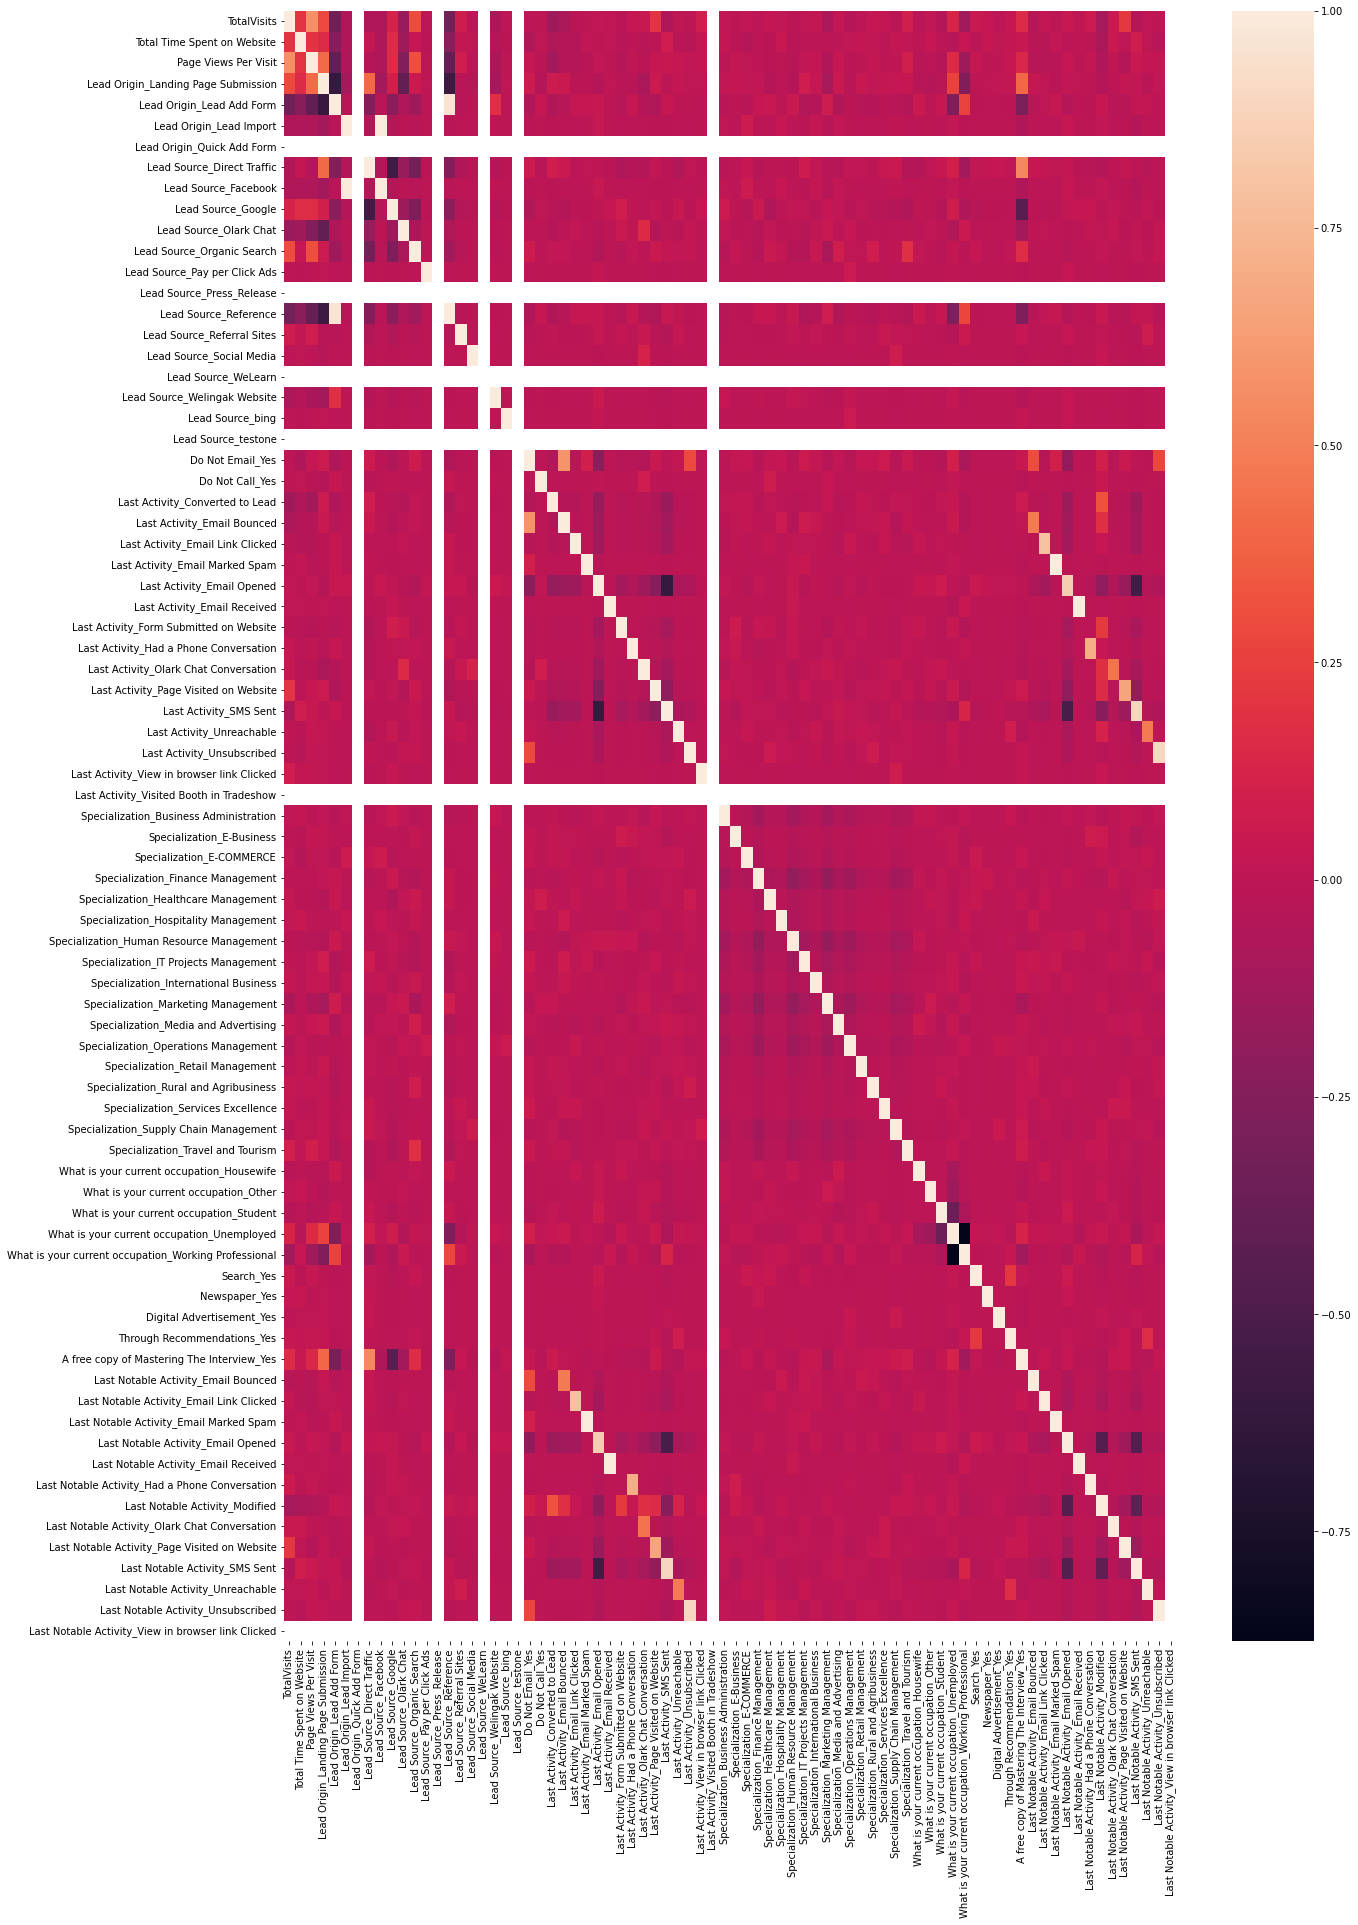

In [75]:
# Now lets check for the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### With so many variables in place it is difficult to check so will check after RFE

### Step 7: Building Models

In [76]:
#creating an object for the logistic regression model

logreg = LogisticRegression()

In [77]:
#Now lets run RFE for 15 variables output

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [78]:
# Now lets check for the feature that is selected by the RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Origin_Quick Add Form', False, 59),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 62),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 25),
 ('Lead Source_testone', False, 63),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 14),
 ('Last Activity_Converted to Lead', False, 18),
 ('Last Activity_Email Bounced', Fals

In [79]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [80]:
# Select only the columns selected by RFE

X_train = X_train[col]

#### MODEL 1:-

In [81]:
# Fit a logistic Regression model on X_train after adding a constant 
# Assessing the model with StatsModel

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3068
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.6
Date:                Mon, 11 Apr 2022   Deviance:                       2725.2
Time:                        09:52:54   Pearson chi2:                 3.97e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8586      0.157     -5.458      0.000      -1.167      -0.550
TotalVisits                                              0.9345      0.286      3.268      0.001       0.374       1.495
Total Time Spent on Website                              4.3125      0.211     20.427      0.000       3.899       4.726
Lead Origin_Landing Page Submission                     -1.1740      0.144     -8.141      0.000      -1.457      -0.891
Lead Origin_Lead Add Form                                1.7863      0.864      2.067      0.039       0.093       3.480
Lead Source_Reference                                    1.3871      0.904      1.535      0.125      -0.384       3.158
Lead Source_Welingak Website                            22.4727   2.25e+04      0.001      0.999    -4.4e+04     4.4e+04
Do Not Email_Yes                                        -1.7150      0.245     -7.007      0.000      -2.195      -1.235
Last Activity_SMS Sent                                   0.9193      0.103      8.927      0.000       0.717       1.121
Specialization_Hospitality Management                   -1.0416      0.374     -2.782      0.005      -1.775      -0.308
What is your current occupation_Housewife               23.7105   2.28e+04      0.001      0.999   -4.46e+04    4.47e+04
What is your current occupation_Working Professional     2.4814      0.204     12.176      0.000       2.082       2.881
Last Notable Activity_Had a Phone Conversation          24.0002    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
Last Notable Activity_Modified                          -0.7849      0.113     -6.953      0.000      -1.006      -0.564
Last Notable Activity_Unreachable                        2.0673      1.170      1.766      0.077      -0.227       4.361
Last Notable Activity_Unsubscribed                       1.4842      0.617      2.405      0.016       0.275       2.694
========================================================================================================================
"""

In [82]:
# Few columns have p value larger than 0.05 .
# let's take a look on VIF value as well to decide how to treat these columns

In [83]:
# Create a dataframe for variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,33.39
4,Lead Source_Reference,32.30
2,Lead Origin_Landing Page Submission,3.57
0,TotalVisits,2.65
1,Total Time Spent on Website,2.27
5,Lead Source_Welingak Website,2.23
7,Last Activity_SMS Sent,1.60
12,Last Notable Activity_Modified,1.41
10,What is your current occupation_Working Profes...,1.30
6,Do Not Email_Yes,1.20


In [84]:
# For two variables VIF range is very high and for others it is googd to go.

#### Let's  drop the "Lead Source_Reference" column since it has a high p-value as well as a high VIF.

In [85]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

#### MODEL 2:-

In [86]:
# Refit the model 

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3069
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1363.6
Date:                Mon, 11 Apr 2022   Deviance:                       2727.2
Time:                        09:52:54   Pearson chi2:                 3.87e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8604      0.157     -5.471      0.000      -1.169      -0.552
TotalVisits                                              0.9363      0.286      3.274      0.001       0.376       1.497
Total Time Spent on Website                              4.3118      0.211     20.430      0.000       3.898       4.725
Lead Origin_Landing Page Submission                     -1.1735      0.144     -8.137      0.000      -1.456      -0.891
Lead Origin_Lead Add Form                                3.0645      0.313      9.794      0.000       2.451       3.678
Lead Source_Welingak Website                            21.1948   2.25e+04      0.001      0.999    -4.4e+04     4.4e+04
Do Not Email_Yes                                        -1.7102      0.244     -7.005      0.000      -2.189      -1.232
Last Activity_SMS Sent                                   0.9198      0.103      8.934      0.000       0.718       1.122
Specialization_Hospitality Management                   -1.0341      0.374     -2.767      0.006      -1.767      -0.302
What is your current occupation_Housewife               23.7158   2.28e+04      0.001      0.999   -4.47e+04    4.48e+04
What is your current occupation_Working Professional     2.4849      0.204     12.203      0.000       2.086       2.884
Last Notable Activity_Had a Phone Conversation          24.0011    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
Last Notable Activity_Modified                          -0.7811      0.113     -6.929      0.000      -1.002      -0.560
Last Notable Activity_Unreachable                        2.0704      1.170      1.770      0.077      -0.223       4.363
Last Notable Activity_Unsubscribed                       1.4103      0.628      2.245      0.025       0.179       2.642
========================================================================================================================
"""

In [87]:
# Few columns have p value larger than 0.05 .
# let's take a look on VIF value as well to decide how to treat these columns again

In [88]:
# Create a dataframe for variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.57
0,TotalVisits,2.65
1,Total Time Spent on Website,2.27
6,Last Activity_SMS Sent,1.60
11,Last Notable Activity_Modified,1.41
3,Lead Origin_Lead Add Form,1.32
9,What is your current occupation_Working Profes...,1.30
5,Do Not Email_Yes,1.20
13,Last Notable Activity_Unsubscribed,1.10
4,Lead Source_Welingak Website,1.05


In [89]:
# VIF for all the columns is now below 0.05.
# As per that now we have to look for variables with high p value and accordingly we can drop the variables

In [90]:
# What is your current occupation_Housewife is having high p value.We can start dropping it first.

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

#### MODEL 3:-

In [91]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3070
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1369.2
Date:                Mon, 11 Apr 2022   Deviance:                       2738.5
Time:                        09:52:54   Pearson chi2:                 3.88e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8529      0.157     -5.433      0.000      -1.161      -0.545
TotalVisits                                              0.9175      0.286      3.213      0.001       0.358       1.477
Total Time Spent on Website                              4.3063      0.211     20.449      0.000       3.894       4.719
Lead Origin_Landing Page Submission                     -1.1649      0.144     -8.098      0.000      -1.447      -0.883
Lead Origin_Lead Add Form                                3.0767      0.312      9.853      0.000       2.465       3.689
Lead Source_Welingak Website                            21.1730   2.25e+04      0.001      0.999    -4.4e+04     4.4e+04
Do Not Email_Yes                                        -1.7151      0.244     -7.032      0.000      -2.193      -1.237
Last Activity_SMS Sent                                   0.9098      0.103      8.851      0.000       0.708       1.111
Specialization_Hospitality Management                   -1.0384      0.373     -2.780      0.005      -1.770      -0.306
What is your current occupation_Working Professional     2.4761      0.203     12.168      0.000       2.077       2.875
Last Notable Activity_Had a Phone Conversation          23.9925    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
Last Notable Activity_Modified                          -0.7731      0.112     -6.883      0.000      -0.993      -0.553
Last Notable Activity_Unreachable                        2.0614      1.169      1.763      0.078      -0.231       4.354
Last Notable Activity_Unsubscribed                       1.4069      0.628      2.240      0.025       0.176       2.638
========================================================================================================================
"""

In [92]:
# Lead Source_Welingak Website is having high p value.We can start dropping it.

X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

#### MODEL 4:

In [93]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3071
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1370.3
Date:                Mon, 11 Apr 2022   Deviance:                       2740.5
Time:                        09:52:54   Pearson chi2:                 3.96e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8513      0.157     -5.423      0.000      -1.159      -0.544
TotalVisits                                              0.9155      0.286      3.205      0.001       0.356       1.475
Total Time Spent on Website                              4.3060      0.211     20.447      0.000       3.893       4.719
Lead Origin_Landing Page Submission                     -1.1649      0.144     -8.098      0.000      -1.447      -0.883
Lead Origin_Lead Add Form                                3.1505      0.311     10.122      0.000       2.541       3.761
Do Not Email_Yes                                        -1.7186      0.244     -7.036      0.000      -2.197      -1.240
Last Activity_SMS Sent                                   0.9086      0.103      8.837      0.000       0.707       1.110
Specialization_Hospitality Management                   -1.0421      0.374     -2.788      0.005      -1.775      -0.309
What is your current occupation_Working Professional     2.4736      0.204     12.150      0.000       2.075       2.873
Last Notable Activity_Had a Phone Conversation          22.9913   1.45e+04      0.002      0.999   -2.85e+04    2.85e+04
Last Notable Activity_Modified                          -0.7741      0.112     -6.893      0.000      -0.994      -0.554
Last Notable Activity_Unreachable                        2.0590      1.170      1.760      0.078      -0.234       4.352
Last Notable Activity_Unsubscribed                       1.4071      0.629      2.237      0.025       0.174       2.640
========================================================================================================================
"""

In [94]:
# Last Notable Activity_Had a Phone Conversation is having high p value.We can start dropping it.

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

#### MODEL 5:-

In [95]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3072
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.9
Date:                Mon, 11 Apr 2022   Deviance:                       2755.7
Time:                        09:52:55   Pearson chi2:                 3.96e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8352      0.157     -5.334      0.000      -1.142      -0.528
TotalVisits                                              0.9661      0.283      3.415      0.001       0.412       1.521
Total Time Spent on Website                              4.2812      0.210     20.405      0.000       3.870       4.692
Lead Origin_Landing Page Submission                     -1.1661      0.143     -8.131      0.000      -1.447      -0.885
Lead Origin_Lead Add Form                                3.1449      0.311     10.109      0.000       2.535       3.755
Do Not Email_Yes                                        -1.7232      0.244     -7.063      0.000      -2.201      -1.245
Last Activity_SMS Sent                                   0.8918      0.103      8.696      0.000       0.691       1.093
Specialization_Hospitality Management                   -1.0471      0.373     -2.805      0.005      -1.779      -0.316
What is your current occupation_Working Professional     2.4651      0.204     12.112      0.000       2.066       2.864
Last Notable Activity_Modified                          -0.7875      0.112     -7.026      0.000      -1.007      -0.568
Last Notable Activity_Unreachable                        2.0359      1.170      1.741      0.082      -0.256       4.328
Last Notable Activity_Unsubscribed                       1.3926      0.628      2.218      0.027       0.162       2.623
========================================================================================================================
"""

In [96]:
# Last Notable Activity_Unreachable is having high p value.We can drop it

X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

#### MODEL 6:-

In [97]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3084
Model:                            GLM   Df Residuals:                     3073
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1379.8
Date:                Mon, 11 Apr 2022   Deviance:                       2759.7
Time:                        09:52:55   Pearson chi2:                 3.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8241      0.156     -5.271      0.000      -1.131      -0.518
TotalVisits                                              0.9687      0.283      3.428      0.001       0.415       1.523
Total Time Spent on Website                              4.2757      0.210     20.399      0.000       3.865       4.687
Lead Origin_Landing Page Submission                     -1.1667      0.143     -8.147      0.000      -1.447      -0.886
Lead Origin_Lead Add Form                                3.1464      0.311     10.118      0.000       2.537       3.756
Do Not Email_Yes                                        -1.7262      0.244     -7.075      0.000      -2.204      -1.248
Last Activity_SMS Sent                                   0.8834      0.102      8.624      0.000       0.683       1.084
Specialization_Hospitality Management                   -1.0514      0.373     -2.817      0.005      -1.783      -0.320
What is your current occupation_Working Professional     2.4695      0.203     12.141      0.000       2.071       2.868
Last Notable Activity_Modified                          -0.7955      0.112     -7.103      0.000      -1.015      -0.576
Last Notable Activity_Unsubscribed                       1.3856      0.628      2.207      0.027       0.155       2.616
========================================================================================================================
"""

In [98]:
# All variables are below 0.05 p value.
# Let's check for VIF values again

In [99]:
# Create a dataframe for variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.56
0,TotalVisits,2.64
1,Total Time Spent on Website,2.26
5,Last Activity_SMS Sent,1.59
8,Last Notable Activity_Modified,1.41
7,What is your current occupation_Working Profes...,1.29
3,Lead Origin_Lead Add Form,1.26
4,Do Not Email_Yes,1.20
9,Last Notable Activity_Unsubscribed,1.10
6,Specialization_Hospitality Management,1.02


#### Now after looking into p value and VIF , both are looking good enough to go to next step ie model evaluation

### Step 8: Model Evaluation

In [100]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

560     0.882880
1093    0.689656
2324    0.632302
2219    0.685306
3044    0.690628
339     0.246336
4287    0.315874
8531    0.094829
2215    0.056166
482     0.822000
dtype: float64

In [101]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.88288014, 0.6896563 , 0.63230224, 0.68530635, 0.69062772,
       0.24633597, 0.31587421, 0.09482901, 0.05616592, 0.82200002])

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.882880,560
1,0,0.689656,1093
2,1,0.632302,2324
3,0,0.685306,2219
4,1,0.690628,3044


In [103]:
# Creating new column "predicted" with 1 if probability >0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check top 5 values

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.882880,560,1
1,0,0.689656,1093,1
2,1,0.632302,2324,1
3,0,0.685306,2219,1
4,1,0.690628,3044,1


In [104]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1225  268]
 [ 339 1252]]


In [105]:
# Predicted     not_churn    churn
# Actual
# not_churn        1225       268
# churn             339      1252

In [106]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8031776913099871


In [107]:
# Metrics beyond simple accuracy

TP=confusion[1,1]  # True Positive
TN =confusion[0,0] # True Negatives
FP =confusion[0,1] # False Positives
FN =confusion[1,0] # False Negatives

In [108]:
# Sensitivity

TP/float (TP+FN)

0.7869264613450659

In [109]:
# Specificity

TN/float (TN+FP)

0.8204956463496316

In [110]:
# Calculate False Postive Rate
# Means when customer actually do not want to convert but they are predicted as they will convert

print(FP/ float(TN+FP))

0.17950435365036838


In [111]:
# Calculate positive predictive value 
# Means when customer predicted as positive either they are actually converting or not 

print (TP / float(TP+FP))

0.8236842105263158


In [112]:
# Calculate Negative predictive value
# Means when customer predicted as negative even when they are converting or not

print (TN / float(TN+ FN))

0.7832480818414322


#### With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 79% and specificity of around 82%.

### Step 9:- Plotting ROC Curve

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

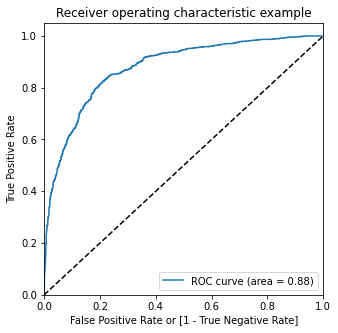

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The area under the curve of the ROC is 0.88 which is quite good. It seems to have a good model

### Finding Optimal Cutoff Point

In [116]:
# We have to find decent cutoff 
# we run through different cut offs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.882880,560,1,1,1,1,1,1,1,1,1,1,0
1,0,0.689656,1093,1,1,1,1,1,1,1,1,0,0,0
2,1,0.632302,2324,1,1,1,1,1,1,1,1,0,0,0
3,0,0.685306,2219,1,1,1,1,1,1,1,1,0,0,0
4,1,0.690628,3044,1,1,1,1,1,1,1,1,0,0,0


In [117]:
# Now let's calculate accuracy,specificity,sensitivity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.515888  1.000000  0.000000
0.1   0.1  0.599222  0.987429  0.185532
0.2   0.2  0.714656  0.954117  0.459478
0.3   0.3  0.780480  0.903206  0.649699
0.4   0.4  0.804150  0.852294  0.752847
0.5   0.5  0.803178  0.786926  0.820496
0.6   0.6  0.785992  0.707102  0.870060
0.7   0.7  0.758755  0.619736  0.906899
0.8   0.8  0.721790  0.512885  0.944407
0.9   0.9  0.655966  0.351980  0.979906


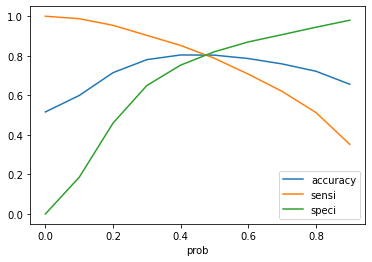

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
#### From the curve, 0.45 is the optimum point to take it as a cutoff probability.

In [120]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.882880,560,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.689656,1093,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.632302,2324,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.685306,2219,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.690628,3044,1,1,1,1,1,1,1,1,0,0,0,1


In [121]:
# Accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8070687418936446

In [122]:
# Create confusion matrix 

confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_new

array([[1200,  293],
       [ 302, 1289]], dtype=int64)

In [123]:
# Predicted     not_converted    converted
# Actual
# not_converted       1200       293
# converted             302      1289

In [124]:
# Metrics beyond simple accuracy

TP=confusion_new[1,1]  # True Positive
TN =confusion_new[0,0] # True Negatives
FP =confusion_new[0,1] # False Positives
FN =confusion_new[1,0] # False Negatives

In [125]:
# Sensitivity

TP/float (TP+FN)

0.8101822752985544

In [126]:
# Specificity

TN/float (TN+FP)

0.8037508372404555

In [127]:
# Calculate False Postive Rate
# Means when customer actually do not want to convert but they are predicted as they will convert

print(FP/ float(TN+FP))

0.19624916275954454


In [128]:
# Calculate positive predictive value 
# Means when customer predicted as positive either they are actually converting or not 

print (TP / float(TP+FP))

0.8147914032869785


In [129]:
# Calculate Negative predictive value
# Means when customer predicted as negative even when they are converting or not

print (TN / float(TN+ FN))

0.7989347536617842


In [130]:
#Precision

TP / TP + FP

confusion_new[1,1]/(confusion_new[0,1]+confusion_new[1,1])

0.8147914032869785

In [131]:
# Precision score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8147914032869785

In [132]:
#Recall score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8101822752985544

####  Precision and Recall trade off

In [133]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

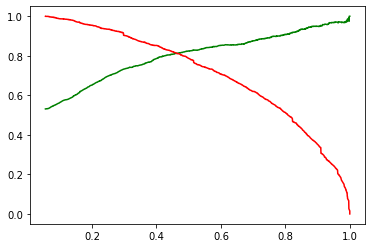

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observation: 
We can see  model seems to be performing well. The ROC curve has a value of 0.88, which is very good. 
We have the following values for the Train Data:

- Accuracy : 80.70%
- Sensitivity : 81%
- Specificity : 80.30%
- Precision : 81%
- Recall : 81%


### Step 10:- Making Predictions on Test Set

In [135]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [136]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
8114,0.263158,0.615757,1,0,0,0,0,0,0,0,0,0,1,0,0
7415,0.210526,0.032570,1,0,0,0,0,0,0,0,0,0,1,0,0
4686,1.000000,0.137324,1,0,0,0,0,1,0,0,0,0,0,0,0
5386,0.421053,0.174296,1,0,0,0,0,0,0,0,0,0,0,0,0
7387,0.157895,0.654049,1,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

8114    0.520939
7415    0.077247
4686    0.601898
5386    0.291629
7387    0.718191
4632    0.016121
2393    0.698803
2657    0.996716
4788    0.996716
2063    0.229453
dtype: float64

In [140]:
# Converting y_pred to a dataframe 

y_pred_df = pd.DataFrame(y_test_pred)

In [141]:
# Check the head

y_pred_df.head()

,0
8114,0.520939
7415,0.077247
4686,0.601898
5386,0.291629
7387,0.718191


In [142]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID in index

y_test_df['Prospect ID'] = y_test_df.index

In [144]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [146]:
# Check the head

y_pred_final.head()

,Converted,Prospect ID,0
0,0,8114,0.520939
1,0,7415,0.077247
2,1,4686,0.601898
3,1,5386,0.291629
4,1,7387,0.718191


In [147]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [148]:
# Check the head again

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8114,0.520939
1,0,7415,0.077247
2,1,4686,0.601898
3,1,5386,0.291629
4,1,7387,0.718191


In [149]:
# Rearranging 

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8114,0,0.520939
1,7415,0,0.077247
2,4686,1,0.601898
3,5386,1,0.291629
4,7387,1,0.718191


In [150]:
# Making prediction using cut off 0.47

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [151]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8114,0,0.520939,1
1,7415,0,0.077247,0
2,4686,1,0.601898,1
3,5386,1,0.291629,0
4,7387,1,0.718191,1


#### Measuring Performance on Test Set

In [165]:
# Create confusion matrix 

confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[560, 176],
       [146, 637]], dtype=int64)

In [153]:
# Predicted     not_converted    converted
# Actual
# not_converted       560       176
# converted           146       637

In [154]:
# Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7880184331797235

In [166]:
TP = confusion_test[1,1] # True Positive 
TN = confusion_test[0,0] # True Negatives
FP = confusion_test[0,1] # False Positives
FN = confusion_test[1,0] # False Negatives

In [167]:
# Sensitivity

TP / float(TP+FN)

0.8135376756066411

In [168]:
# Specificity

TN / float(TN+FP)

0.7608695652173914

In [169]:
# Precision = TP / TP + FP

confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7835178351783518

In [171]:
#Recall = TP / TP + FN

confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8135376756066411

#### Observation: 
We can see  test model seems to be performing well.
We have the following values for the Test Data:

- Accuracy : 78.8%
- Sensitivity : 81.3%
- Specificity : 76%
- Precision : 78.3%
- Recall : 81.3%


This concludes that the model is in stable state.
Important features responsible for good conversion rate or the ones which contributes more towards 
the probability of a lead getting converted are :
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all 
the potential buyers to change their mind and buy their courses